In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

VOC_SIZE = 7881
max_length_sequence = 100

# tf.random.set_seed(1)
np.random.seed(1)

In [2]:
#importing previously preprocessed and vectorized dataset from preprocessing notebook as pickle file


x = np.load('data.npy')
y = np.load("y.npy")

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(VOC_SIZE, 32, input_length=max_length_sequence))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           252192    
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                3440      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 255,653
Trainable params: 255,653
Non-trainable params: 0
_________________________________________________________________


In [4]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("model-{epoch:02d}.h5", save_best_only=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
history = model.fit(X_train, y_train, epochs = 3, batch_size=5, validation_split=0.25)

Epoch 1/3
669/669 [==============================] - 68s 88ms/step - loss: 0.2014 - accuracy: 0.9315 - val_loss: 0.0669 - val_accuracy: 0.9830
Epoch 2/3
669/669 [==============================] - 49s 73ms/step - loss: 0.0451 - accuracy: 0.9901 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 3/3
669/669 [==============================] - 41s 62ms/step - loss: 0.0182 - accuracy: 0.9973 - val_loss: 0.0410 - val_accuracy: 0.9910


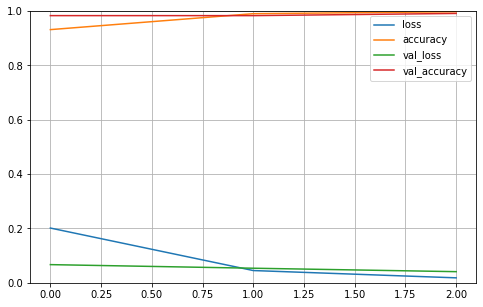

In [7]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 2s 11ms/step - loss: 0.0551 - accuracy: 0.9865


[0.05506720021367073, 0.9865471124649048]

In [9]:
pred = model.predict(X_test)>0.5

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.92      0.94       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

